In [2]:
import tensorflow as tf 

In [3]:
! r"E:\GenerativeAi\Deep learning\CNN\projects\chest_xray\test\NORMAL\NORMAL2-IM-0373-0001.jpeg"

The filename, directory name, or volume label syntax is incorrect.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os

In [9]:
DataDir = r"E:\GenerativeAi\Deep learning\CNN\projects\chest_xray\train/"

In [10]:
CATAGORIES = ["NORMAL","PNEUMONIA"]

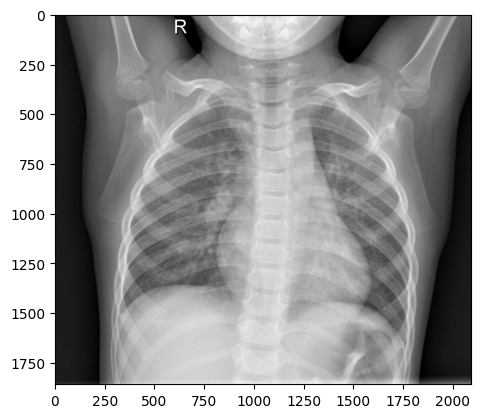

In [11]:
for x in CATAGORIES:   
    path=os.path.join(DataDir,x)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [12]:
img_size = 100


In [13]:
new_array=cv2.resize(img_array,(img_size,img_size))
# plt.show(new_array,'gray')
# plt.show()



In [14]:
new_array.shape

(100, 100)

In [15]:
training_Data = []


In [16]:
def create_traning_data():
    for x in CATAGORIES:
        path=os.path.join(DataDir,x)
        class_num=CATAGORIES.index(x)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [17]:
create_traning_data()

In [18]:
print(len(training_Data))

5232


In [19]:
import random

random.shuffle(training_Data)
for sample in training_Data[:10]:
    print(sample[1])
    # plt.imshow(sample[0])
    # plt.show()

1
1
1
0
1
1
1
1
1
0


In [20]:
x = []
y = []

In [21]:
for feature,label in training_Data:
    x.append(feature)
    y.append(label)

In [22]:
x[0].reshape(-1,img_size,img_size,1)

array([[[[125],
         [122],
         [128],
         ...,
         [ 89],
         [ 78],
         [ 91]],

        [[130],
         [121],
         [125],
         ...,
         [ 81],
         [ 87],
         [ 86]],

        [[128],
         [ 97],
         [ 98],
         ...,
         [ 80],
         [ 71],
         [ 79]],

        ...,

        [[ 33],
         [102],
         [ 95],
         ...,
         [109],
         [121],
         [ 43]],

        [[ 33],
         [ 98],
         [100],
         ...,
         [104],
         [121],
         [ 56]],

        [[ 35],
         [102],
         [111],
         ...,
         [101],
         [103],
         [ 70]]]], dtype=uint8)

In [23]:
y = np.array(y)

In [40]:
x = np.array(x).reshape(-1,img_size,img_size,1)

In [46]:
x

array([[[[125],
         [122],
         [128],
         ...,
         [ 89],
         [ 78],
         [ 91]],

        [[130],
         [121],
         [125],
         ...,
         [ 81],
         [ 87],
         [ 86]],

        [[128],
         [ 97],
         [ 98],
         ...,
         [ 80],
         [ 71],
         [ 79]],

        ...,

        [[ 33],
         [102],
         [ 95],
         ...,
         [109],
         [121],
         [ 43]],

        [[ 33],
         [ 98],
         [100],
         ...,
         [104],
         [121],
         [ 56]],

        [[ 35],
         [102],
         [111],
         ...,
         [101],
         [103],
         [ 70]]],


       [[[  0],
         [  0],
         [  3],
         ...,
         [ 34],
         [ 33],
         [ 30]],

        [[  0],
         [  0],
         [  2],
         ...,
         [ 35],
         [ 33],
         [ 31]],

        [[  0],
         [  0],
         [  1],
         ...,
         [ 34],
         [

In [48]:
y[10:20
  ]

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [41]:
# validation_data = []
# DataDir_val = r"val/"


In [42]:
# def create_validation_data():
#     for x in CATAGORIES:
#         path=os.path.join(DataDir_val,x) # E:\GenerativeAi\Deep learning\CNN\projects\chest_xray\val
#         class_num=CATAGORIES.index(x) # 0
#         for img in os.listdir(path): # NORMAL
#             try:
#                 img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#                 new_array=cv2.resize(img_array,(img_size,img_size))
#                 validation_data.append([new_array,class_num])
#             except Exception as e:
#                 pass

In [43]:
# create_validation_data()

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

In [ ]:
model.add(Conv2D(32,
                  kernel_size=(3, 3),
                    activation='relu', 
                    input_shape=(img_size, img_size, 1))) # (100,100,1)
model.add(MaxPooling2D(pool_size=(2, 2))) # 50 * 50

model.add(Conv2D(64, kernel_size=(3, 3),
                  activation='relu')) # 50 * 50

model.add(MaxPooling2D(pool_size=(2, 2))) # 25 * 25

model.add(Flatten()) # 625

model.add(Dense(64, activation='relu'))# relu funtion is used for activation function

model.add(Dropout(0.5)) # 0.5 dropout rate 

model.add(Dense(1, activation='sigmoid')) # 1 output sigmoid is used for activation function it is used for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # binary_crossentropy is used for binary classification and adam is used for optimization 

model.fit(x, y, epochs=10, batch_size=32) # epochs is used for training and batch_size is used for training , batch_size is used for training

c:\Users\kumaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.8065 - loss: 10.0167
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9350 - loss: 0.1655
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.9603 - loss: 0.1230
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9648 - loss: 0.1056
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.9623 - loss: 0.0997
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.9540 - loss: 0.1198
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9601 - loss: 0.1183
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.9803 - loss: 0.0545
Epoch 9/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.9713 - loss: 0.0765
Epoch 10/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9755 - loss: 0.0637


In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,557,189 (25.01 MB)

 Trainable params: 2,185,729 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,371,460 (16.68 MB)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # binary_crossentropy is used for binary classification and adam is used for optimization

In [52]:
model.save("chest_xray.h5")

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os

image = r"E:\GenerativeAi\Deep learning\CNN\projects\chest_xray\train\NORMAL\IM-0131-0001.jpeg"
image2 = r"E:\GenerativeAi\Deep learning\CNN\projects\chest_xray\train\PNEUMONIA\person5_bacteria_16.jpeg"
image3 = r"E:\GenerativeAi\Deep learning\CNN\projects\chest_xray\train\NORMAL\IM-0458-0001.jpeg"

In [122]:
import tensorflow as tf 
model = tf.keras.models.load_model("chest_xray.h5")

In [123]:
def prepare(image3):
    img_size = 100
    img = tf.keras.preprocessing.image.load_img(image, target_size=(img_size, img_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    return img_array.reshape(-1, img_size, img_size, 1)


In [124]:
predication=model.predict([prepare(image3=image3)/255])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [126]:
predication

array([[0.70654297],
       [0.81943643],
       [0.82162535]], dtype=float32)

In [127]:
round(predication[0][0])

1

In [118]:
print(CATAGORIES[round(predication[0][0])])

PNEUMONIA


In [119]:
import matplotlib.image as mpimg

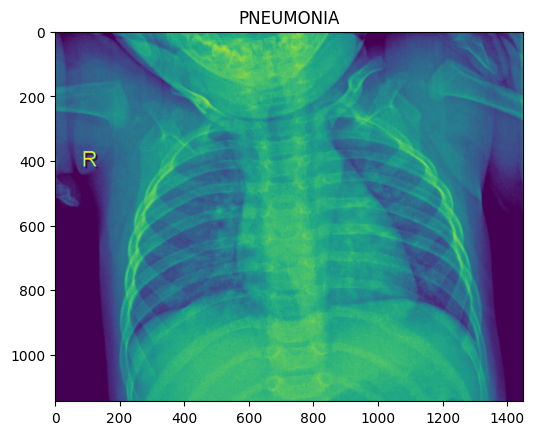

In [120]:
image=mpimg.imread(image)
plt.imshow(image)
plt.title(CATAGORIES[round(predication[0][0])])
plt.show()
